## Dataset: CIFAR10 | Framework: Keras (Tensorflow)

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split

### Loading Dataset

In [4]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Visualization - Output Classes

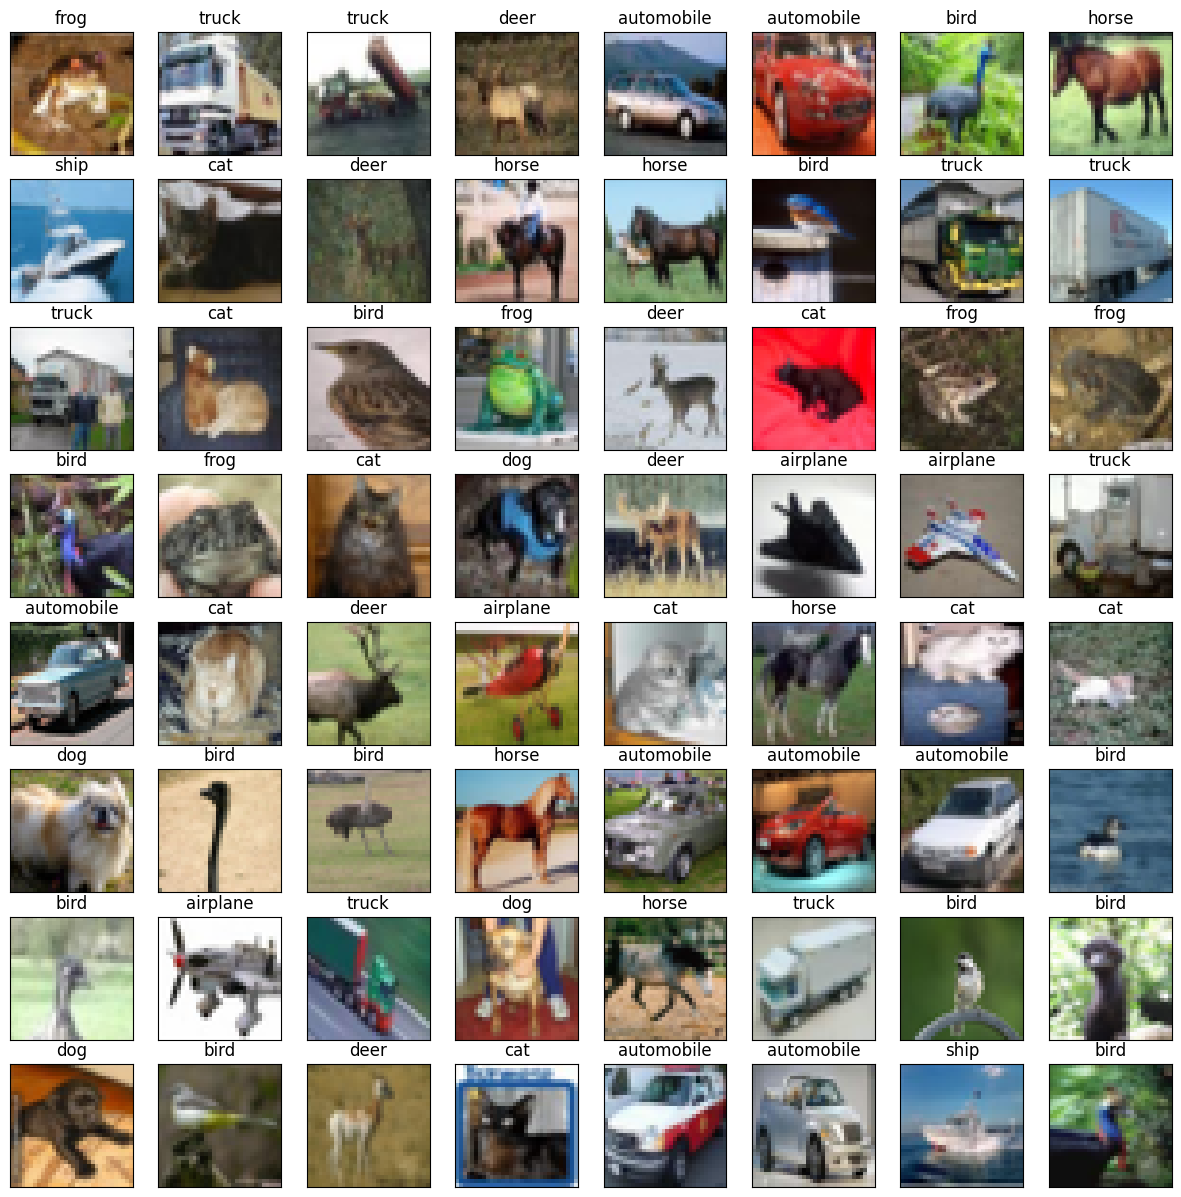

In [7]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [8]:
# what is an image?
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [9]:
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

#### Scalling

In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Checking Balanced or Imbalanced dataset

In [12]:
unique, counts = np.unique(y_train, return_counts=True)

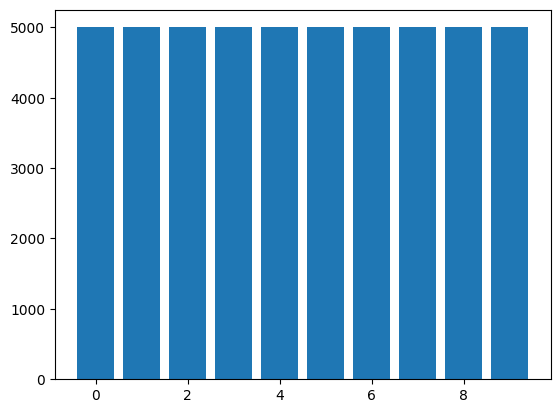

In [13]:
plt.bar(unique, counts)
plt.show()

**Above Dataset is Balanced**

## MLP

In [12]:
mlp_model = models.Sequential(name="MLP_model")

mlp_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
mlp_model.add(layers.Flatten())
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

mlp_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
mlp_history = mlp_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=256,
                            validation_split=0.1
                            )

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2305 - loss: 2.1401 - val_accuracy: 0.3492 - val_loss: 1.8046
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3760 - loss: 1.7443 - val_accuracy: 0.4062 - val_loss: 1.6633
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4107 - loss: 1.6398 - val_accuracy: 0.4290 - val_loss: 1.6237
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4327 - loss: 1.5728 - val_accuracy: 0.4298 - val_loss: 1.5869
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4502 - loss: 1.5319 - val_accuracy: 0.4496 - val_loss: 1.5318
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4718 - loss: 1.4834 - val_accuracy: 0.4654 - val_loss: 1.4922
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4897 - loss: 1.4369 - val_accuracy: 0.4882 - val_loss: 1.4564
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5034 - loss: 1.3949 - val_accuracy: 0

In [16]:
train_loss, train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.7493
✅ Test Accuracy: 0.5007

✅ Train Loss: 0.7518
✅ Test Loss: 1.8279


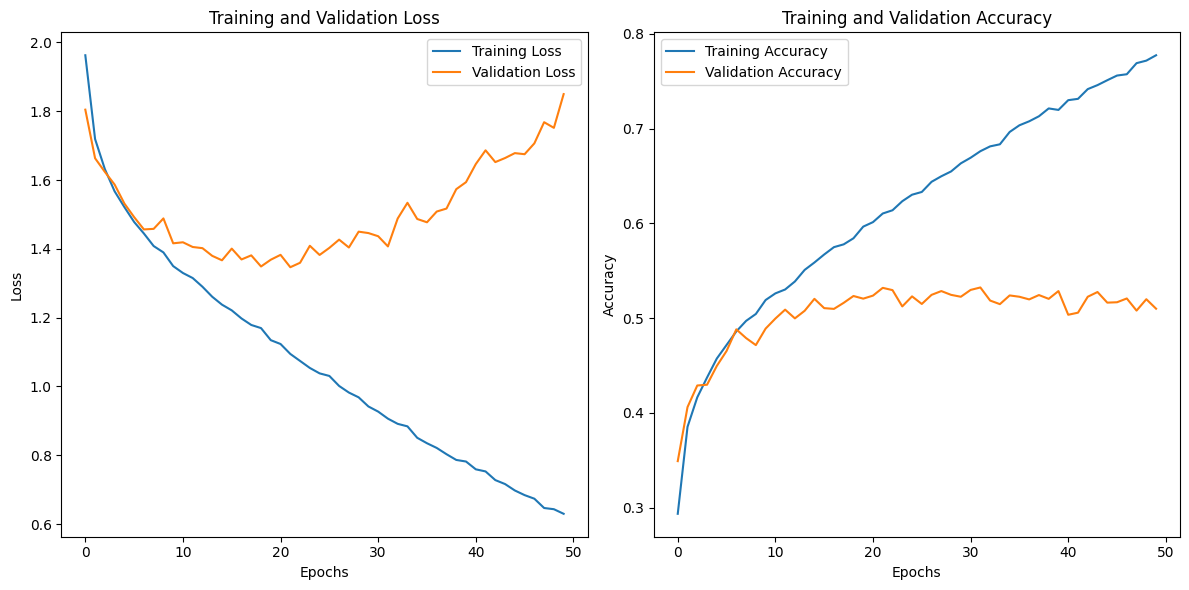

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
predictions_mlp = mlp_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

In [20]:
# what are the predictions?
predictions_mlp[0]

array([2.8612957e-04, 1.4168913e-03, 6.2015681e-03, 6.3133545e-02,
       8.9467025e-01, 1.5472179e-02, 1.6567948e-06, 1.2490400e-02,
       6.0175713e-03, 3.0980617e-04], dtype=float32)

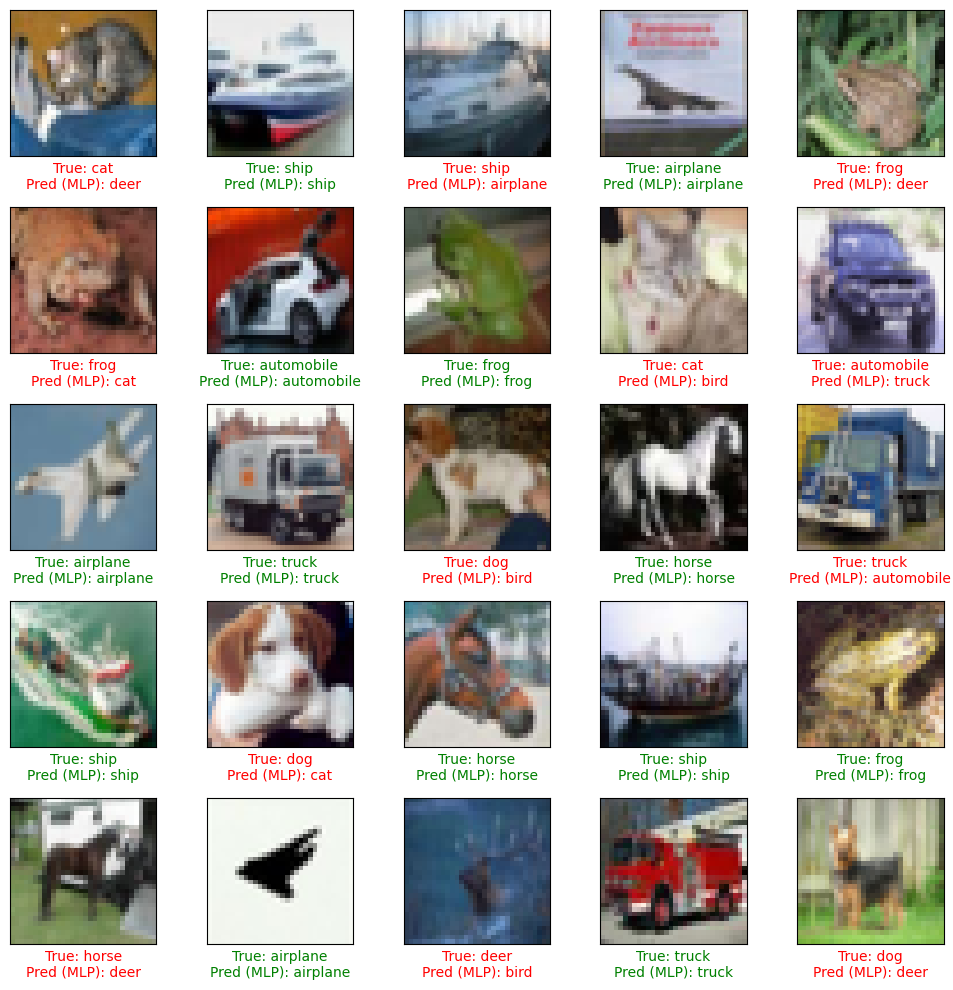

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]
    if true_label == predicted_label_mlp:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()
plt.show()

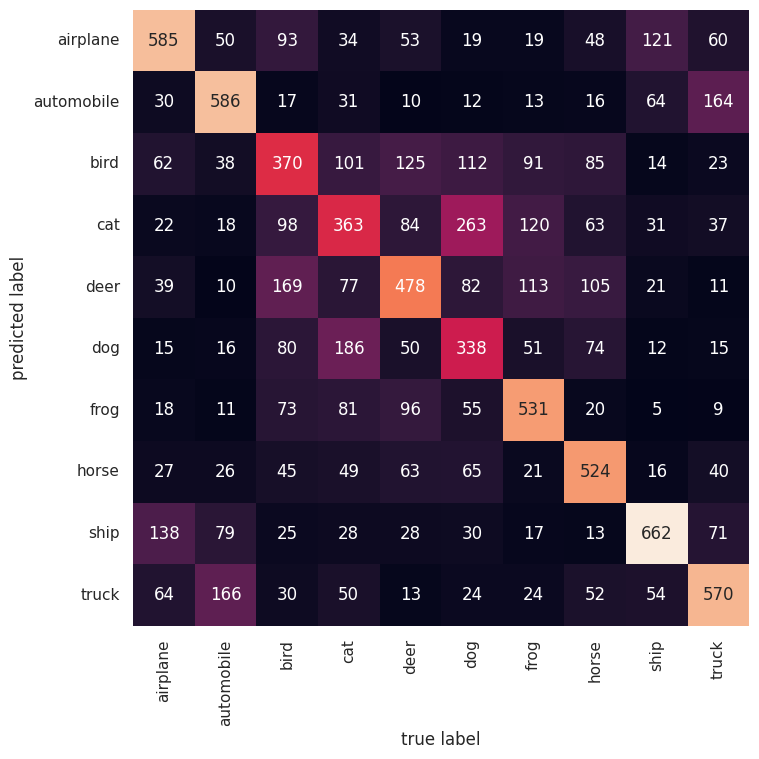

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [23]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.54      0.58      0.56      1000
  automobile       0.62      0.59      0.60      1000
        bird       0.36      0.37      0.37      1000
         cat       0.33      0.36      0.35      1000
        deer       0.43      0.48      0.45      1000
         dog       0.40      0.34      0.37      1000
        frog       0.59      0.53      0.56      1000
       horse       0.60      0.52      0.56      1000
        ship       0.61      0.66      0.63      1000
       truck       0.54      0.57      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



## CNN Model-1

In [24]:
cnn_model = models.Sequential(name="CNN_model")

cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.2458 - loss: 2.0349 - val_accuracy: 0.4720 - val_loss: 1.4649
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4472 - loss: 1.5388 - val_accuracy: 0.5372 - val_loss: 1.3196
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5130 - loss: 1.3572 - val_accuracy: 0.6196 - val_loss: 1.0993
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5660 - loss: 1.2159 - val_accuracy: 0.6504 - val_loss: 1.0126
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6001 - loss: 1.1199 - val_accuracy: 0.6782 - val_loss: 0.9289
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6245 - loss: 1.0555 - val_accuracy: 0.6998 - val_loss: 0.8736
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6494 - loss: 0.9965 - val_accuracy: 0.7102 - val_loss: 0.8525
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6662 - loss: 0.9533 - val_acc

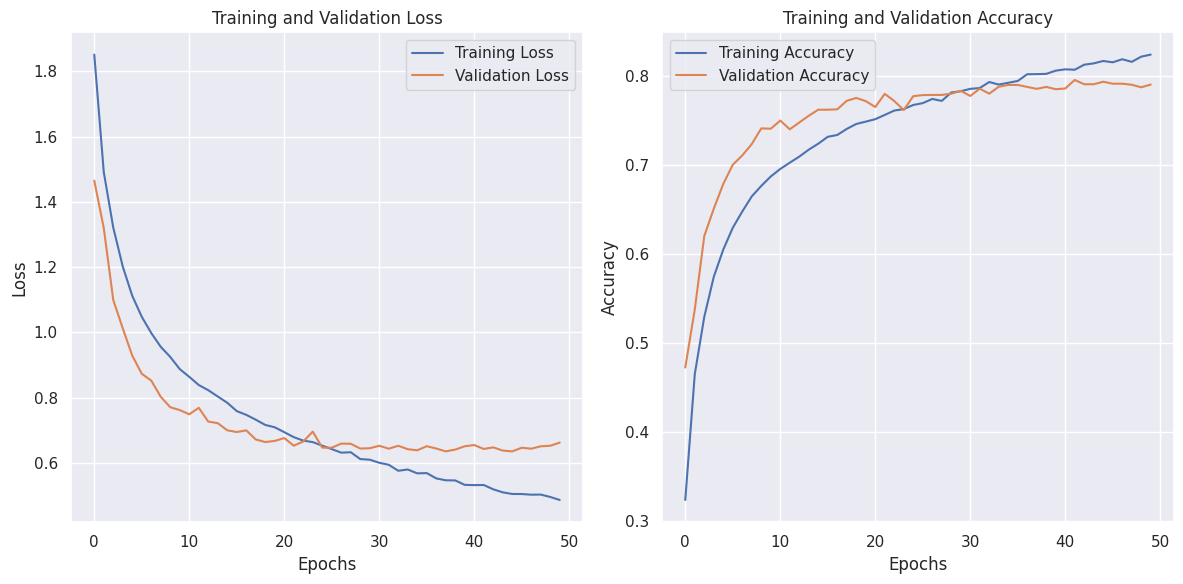

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.9301
✅ Test Accuracy: 0.7822

✅ Train Loss: 0.2484
✅ Test Loss: 0.6799


In [28]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


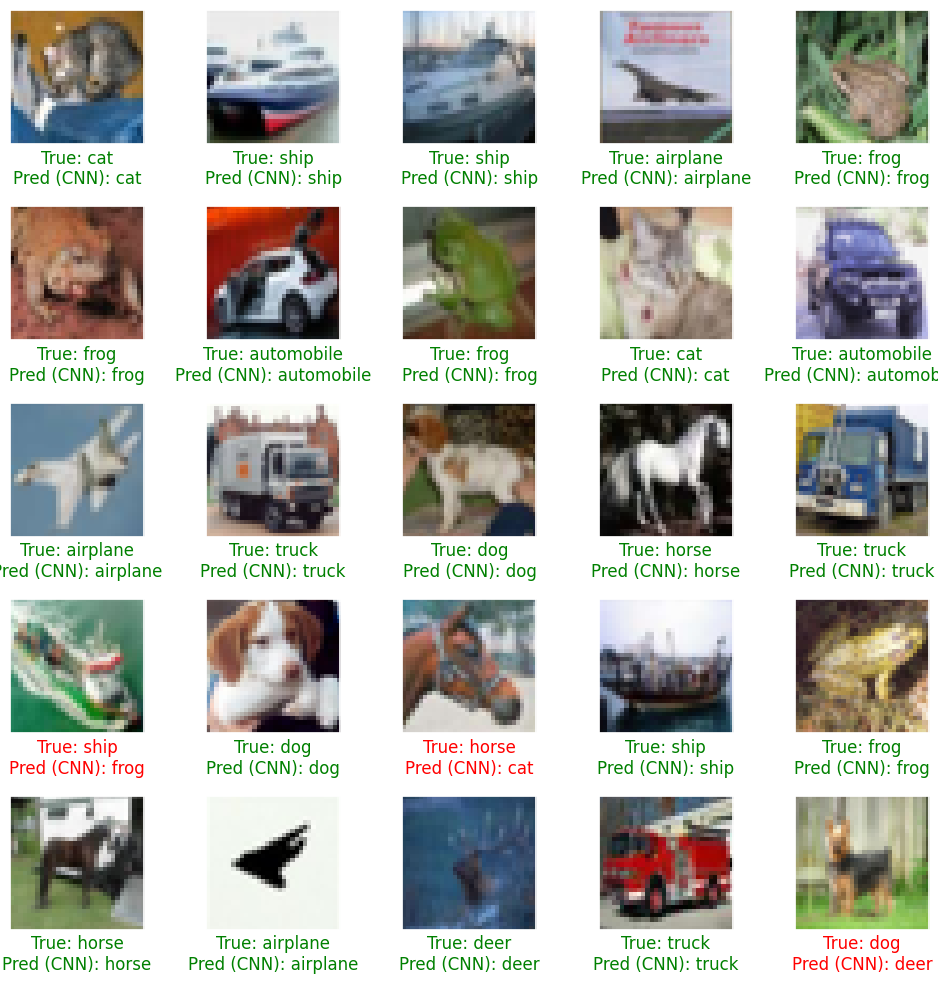

In [29]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

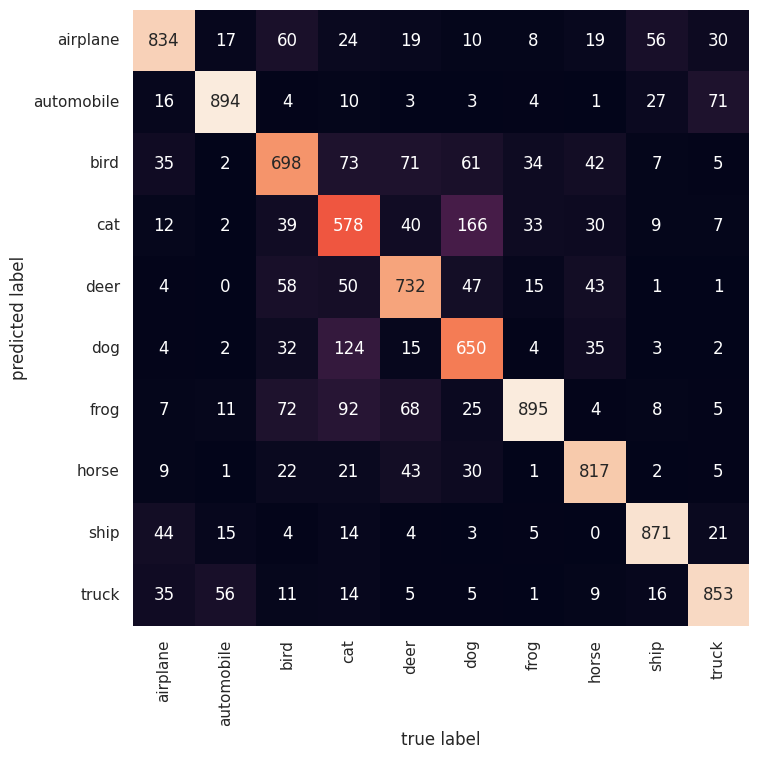

In [30]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [31]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.77      0.83      0.80      1000
  automobile       0.87      0.89      0.88      1000
        bird       0.68      0.70      0.69      1000
         cat       0.63      0.58      0.60      1000
        deer       0.77      0.73      0.75      1000
         dog       0.75      0.65      0.69      1000
        frog       0.75      0.90      0.82      1000
       horse       0.86      0.82      0.84      1000
        ship       0.89      0.87      0.88      1000
       truck       0.85      0.85      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



## CNN Model-2

In [40]:
from tensorflow.keras import regularizers

cnn_model_2 = models.Sequential(name="CNN_model")

cnn_model_2.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_model_2.add(layers.Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
cnn_model_2.add(layers.BatchNormalization())
cnn_model_2.add(layers.Activation('relu'))
cnn_model_2.add(layers.Dropout(0.3))

cnn_model_2.add(layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
cnn_model_2.add(layers.BatchNormalization())
cnn_model_2.add(layers.Activation('relu'))
cnn_model_2.add(layers.Dropout(0.3))

cnn_model_2.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
cnn_model_2.add(layers.BatchNormalization())
cnn_model_2.add(layers.Activation('relu'))
cnn_model_2.add(layers.Dropout(0.3))
cnn_model_2.add(layers.MaxPooling2D((2, 2)))

cnn_model_2.add(layers.Flatten())

# Dense Block
cnn_model_2.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001)))
cnn_model_2.add(layers.BatchNormalization())   # normalize outputs from Dense
cnn_model_2.add(layers.Activation('relu'))     # apply activation separately
cnn_model_2.add(layers.Dropout(0.5))

# Output Layer
cnn_model_2.add(layers.Dense(10, activation='softmax'))


optimizer = Adam(learning_rate=0.001)
cnn_model_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,290,378 (16.37 MB)

 Trainable params: 4,289,674 (16.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [41]:
cnn_history_2 = cnn_model_2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 0.3665 - loss: 2.3451 - val_accuracy: 0.1108 - val_loss: 5.3844
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.5806 - loss: 1.6318 - val_accuracy: 0.1280 - val_loss: 4.5561
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6456 - loss: 1.4381 - val_accuracy: 0.2714 - val_loss: 3.2630
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6758 - loss: 1.3516 - val_accuracy: 0.3064 - val_loss: 2.8208
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.6901 - loss: 1.3287 - val_accuracy: 0.6158 - val_loss: 1.5937
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.7073 - loss: 1.2974 - val_accuracy: 0.6164 - val_loss: 1.5526
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.7197 - loss: 1.2878 - val_accuracy: 0.4866 - val_loss: 2.0449
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.7295 - loss: 1.2865 -

In [42]:
train_loss, train_accuracy = cnn_model_2.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.7812
✅ Test Accuracy: 0.6652

✅ Train Loss: 1.4825
✅ Test Loss: 1.8085


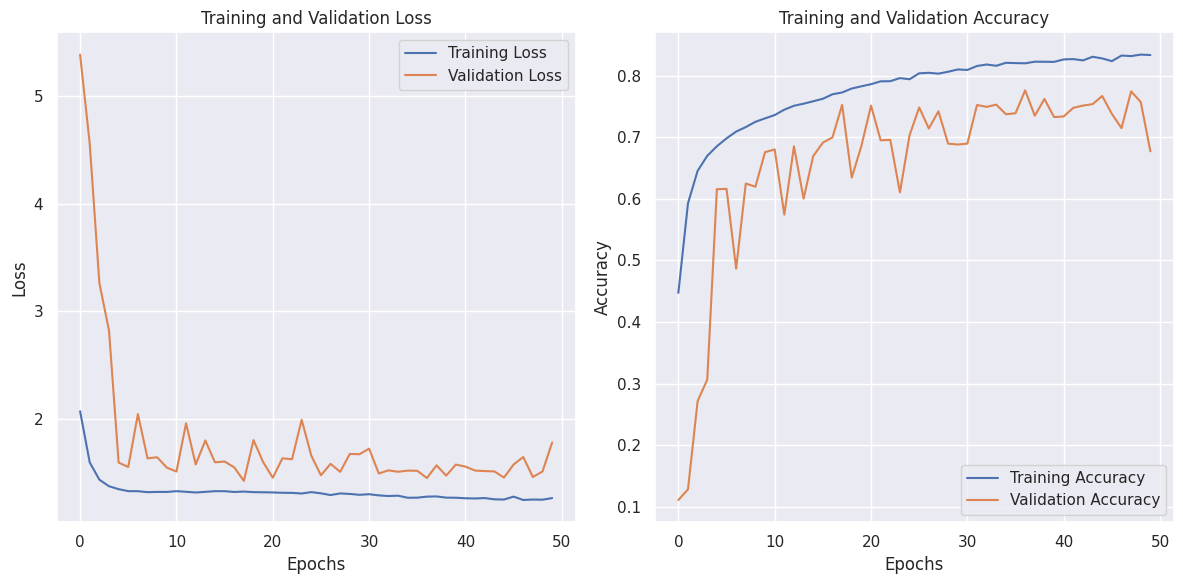

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_2.history['loss'], label='Training Loss')
plt.plot(cnn_history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history_2.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## CNN Model-4

In [46]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

cnn_model_4 = models.Sequential(name="CNN_model")

cnn_model_4.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model_4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_model_4.add(layers.Dropout(0.25))
cnn_model_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_4.add(layers.MaxPooling2D((2, 2)))
cnn_model_4.add(layers.Dropout(0.25))

cnn_model_4.add(layers.Flatten())

cnn_model_4.add(layers.Dense(128, activation='relu'))
cnn_model_4.add(layers.Dropout(0.5))
cnn_model_4.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model_4.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model_4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_classify_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

cnn_history_4 = cnn_model_4.fit(X_train, y_train,
                                      validation_split=0.1,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      epochs=150,
                                      batch_size=128,
                                      verbose=1)

Epoch 1/150
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2808 - loss: 1.9449
Epoch 1: val_loss improved from inf to 1.37761, saving model to best_classify_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.2811 - loss: 1.9442 - val_accuracy: 0.5166 - val_loss: 1.3776 - learning_rate: 0.0010
Epoch 2/150
348/352 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4846 - loss: 1.4275
Epoch 2: val_loss improved from 1.37761 to 1.11669, saving model to best_classify_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4849 - loss: 1.4268 - val_accuracy: 0.6146 - val_loss: 1.1167 - learning_rate: 0.0010
Epoch 3/150
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5648 - loss: 1.2246
Epoch 3: val_loss improved from 1.11669 to 0.99726, saving model to best_classify_model.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5649 - loss: 1.2245 - val_accuracy: 0.6508 - val_loss: 0.9973 - learning_rate: 0.0010
Epoch 4/150
351/352 ━━━━━━━━━━━

In [48]:
train_loss, train_accuracy = cnn_model_4.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model_4.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.9174
✅ Test Accuracy: 0.7784

✅ Train Loss: 0.2882
✅ Test Loss: 0.6436


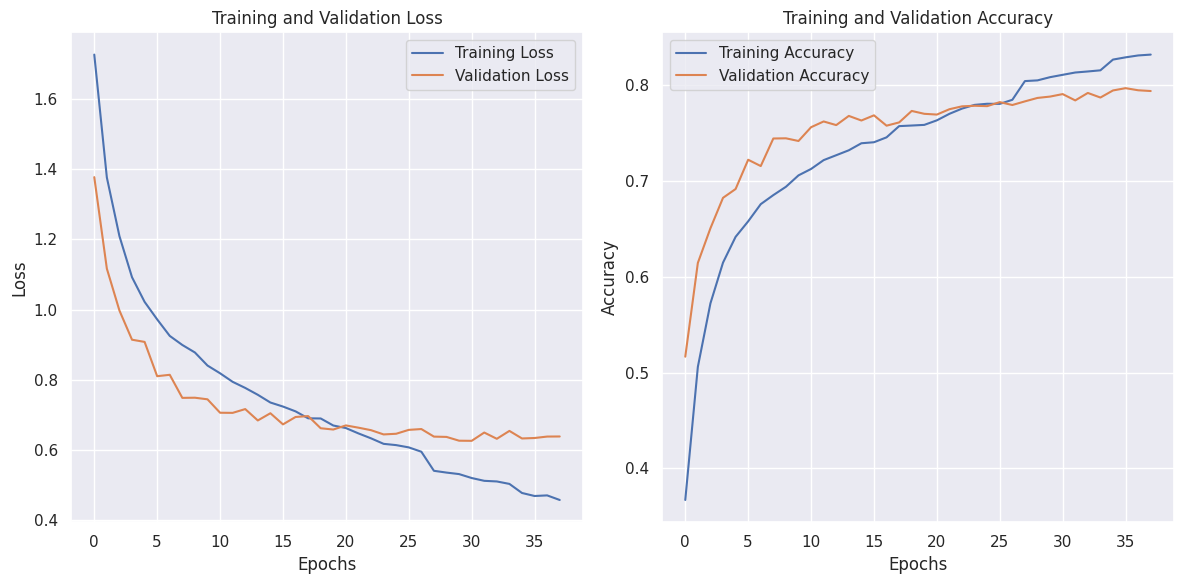

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_4.history['loss'], label='Training Loss')
plt.plot(cnn_history_4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history_4.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## CNN Model-5

In [11]:
cnn_model_5 = models.Sequential(name="CNN_model")

cnn_model_5.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model_5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_5.add(layers.MaxPooling2D((2, 2)))
cnn_model_5.add(layers.Dropout(0.25))
cnn_model_5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_5.add(layers.MaxPooling2D((2, 2)))
cnn_model_5.add(layers.Dropout(0.25))

cnn_model_5.add(layers.Flatten())

cnn_model_5.add(layers.Dense(128, activation='relu'))
cnn_model_5.add(layers.Dropout(0.5))
cnn_model_5.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model_5.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model_5.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
cnn_history_5 = cnn_model_5.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.2)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.2227 - loss: 2.0734 - val_accuracy: 0.4463 - val_loss: 1.5683
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4187 - loss: 1.5964 - val_accuracy: 0.5250 - val_loss: 1.3526
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4964 - loss: 1.4049 - val_accuracy: 0.5426 - val_loss: 1.3101
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5447 - loss: 1.2781 - val_accuracy: 0.6201 - val_loss: 1.1019
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5859 - loss: 1.1761 - val_accuracy: 0.6365 - val_loss: 1.0393
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6151 - loss: 1.0885 - val_accuracy: 0.6684 - val_loss: 0.9735
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6277 - loss: 1.0538 - val_accuracy: 0.6856 - val_loss: 0.9032
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6480 - loss: 0.9938 - val_acc

In [13]:
train_loss, train_accuracy = cnn_model_5.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.9160
✅ Test Accuracy: 0.7699

✅ Train Loss: 0.2970
✅ Test Loss: 0.6904


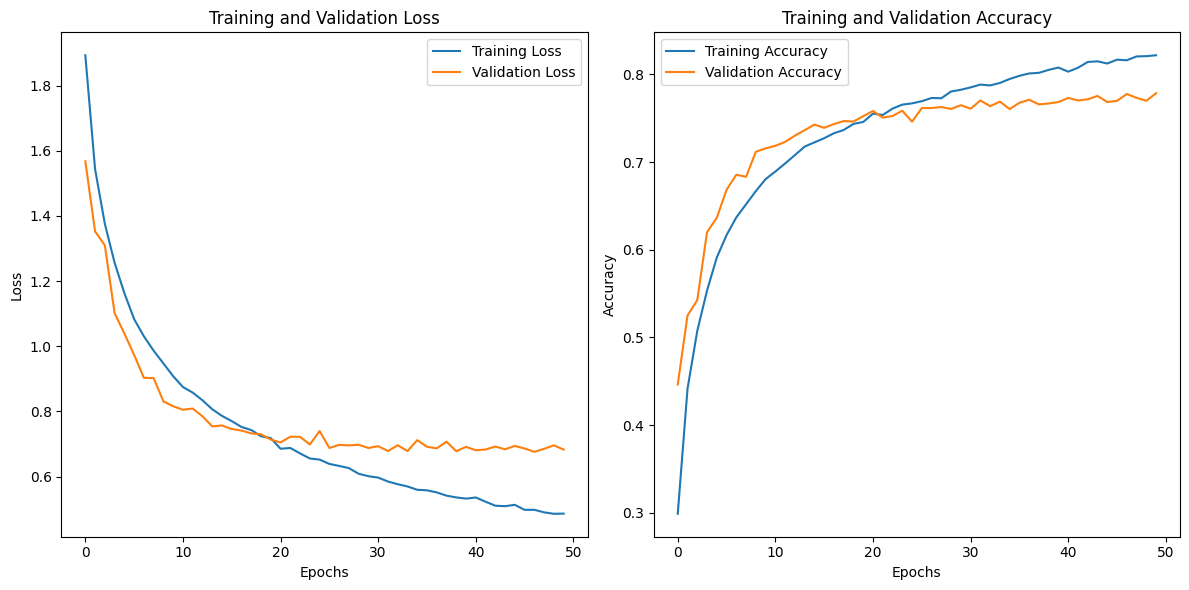

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_5.history['loss'], label='Training Loss')
plt.plot(cnn_history_5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history_5.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_5.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## CNN Model-6

In [15]:
cnn_model_6 = models.Sequential(name="CNN_model")

cnn_model_6.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model_6.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model_6.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_6.add(layers.MaxPooling2D((2, 2)))
cnn_model_6.add(layers.Dropout(0.25))
cnn_model_6.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model_6.add(layers.MaxPooling2D((2, 2)))
cnn_model_6.add(layers.Dropout(0.25))

cnn_model_6.add(layers.Flatten())

cnn_model_6.add(layers.Dense(128, activation='relu'))
cnn_model_6.add(layers.Dropout(0.5))
cnn_model_6.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model_6.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model_6.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
cnn_history_6 = cnn_model_6.fit(X_train, y_train,
                    epochs=70,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.2648 - loss: 1.9840 - val_accuracy: 0.5084 - val_loss: 1.3943
Epoch 2/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4667 - loss: 1.4620 - val_accuracy: 0.6006 - val_loss: 1.1505
Epoch 3/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5511 - loss: 1.2523 - val_accuracy: 0.6622 - val_loss: 0.9838
Epoch 4/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5855 - loss: 1.1567 - val_accuracy: 0.6728 - val_loss: 0.9437
Epoch 5/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6171 - loss: 1.0747 - val_accuracy: 0.6858 - val_loss: 0.8953
Epoch 6/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6406 - loss: 1.0214 - val_accuracy: 0.7112 - val_loss: 0.8371
Epoch 7/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6582 - loss: 0.9722 - val_accuracy: 0.7300 - val_loss: 0.7939
Epoch 8/70
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6788 - loss: 0.9114 - val_acc

In [17]:
train_loss, train_accuracy = cnn_model_6.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model_6.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.9474
✅ Test Accuracy: 0.7830

✅ Train Loss: 0.1994
✅ Test Loss: 0.6821


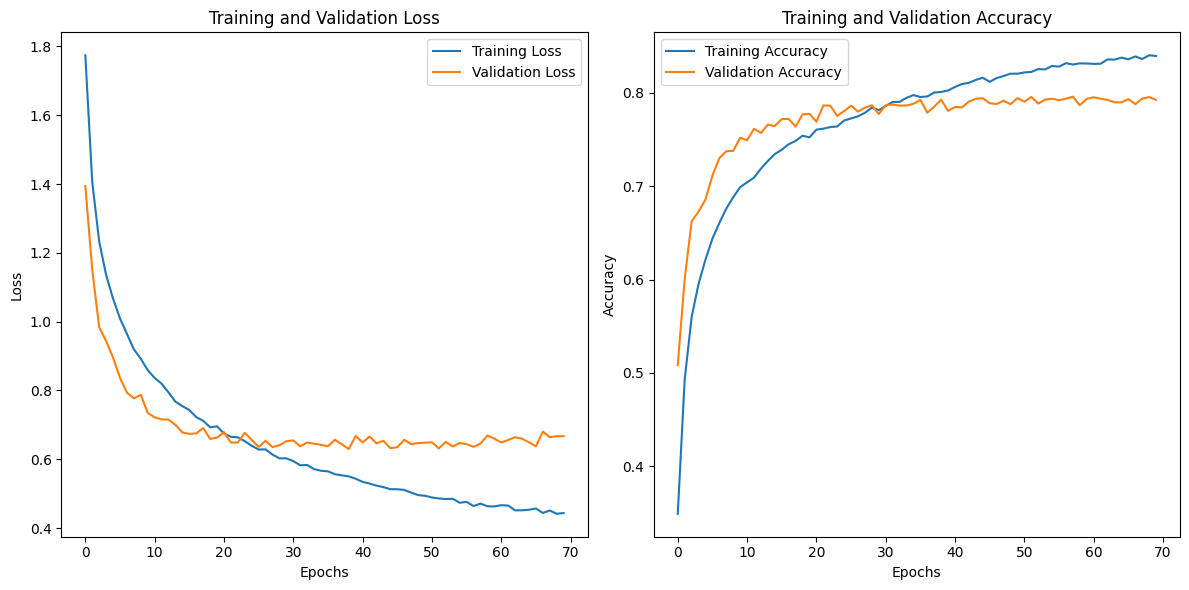

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_6.history['loss'], label='Training Loss')
plt.plot(cnn_history_6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history_6.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_6.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## CNN Model-7

In [31]:
from tensorflow.keras import regularizers
cnn_model_7 = models.Sequential(name="CNN_model")

cnn_model_7.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_model_7.add(layers.Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
cnn_model_7.add(layers.Activation('relu'))

cnn_model_7.add(layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
cnn_model_7.add(layers.Activation('relu'))
cnn_model_7.add(layers.Dropout(0.3))
cnn_model_7.add(layers.MaxPooling2D((2, 2)))

cnn_model_7.add(layers.Flatten())

cnn_model_7.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.001)))
cnn_model_7.add(layers.Activation('relu'))
cnn_model_7.add(layers.Dropout(0.5))

cnn_model_7.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model_7.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model_7.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
cnn_history_7 = cnn_model_7.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.2166 - loss: 2.2993 - val_accuracy: 0.4818 - val_loss: 1.7059
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4035 - loss: 1.7332 - val_accuracy: 0.5354 - val_loss: 1.5597
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4608 - loss: 1.6073 - val_accuracy: 0.5546 - val_loss: 1.4749
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.4783 - loss: 1.5521 - val_accuracy: 0.5732 - val_loss: 1.4300
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5039 - loss: 1.5041 - val_accuracy: 0.5960 - val_loss: 1.3862
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5179 - loss: 1.4728 - val_accuracy: 0.6178 - val_loss: 1.3514
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5342 - loss: 1.4235 - val_accuracy: 0.6346 - val_loss: 1.3189
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5401 - loss: 1.4037 - val_acc

In [33]:
train_loss, train_accuracy = cnn_model_7.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model_7.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.7917
✅ Test Accuracy: 0.6870

✅ Train Loss: 0.9258
✅ Test Loss: 1.1456


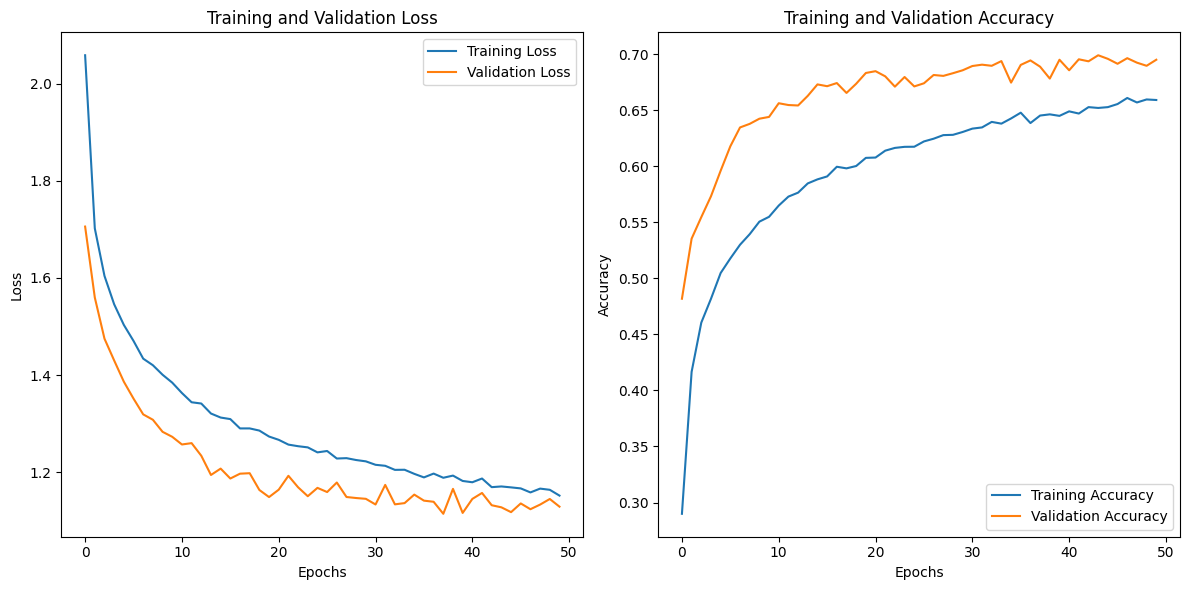

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_7.history['loss'], label='Training Loss')
plt.plot(cnn_history_7.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history_7.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_7.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# CNN More Layers (like VGG-16 Architecture)

In [7]:
model = models.Sequential(name="CNN_model")

model.add(layers.InputLayer(input_shape=(32, 32, 3)))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))



optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,251,018 (58.18 MB)

 Trainable params: 15,248,074 (58.17 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [8]:
history = model.fit(X_train,y_train,
                            epochs=100,
                            batch_size=256,
                            validation_split=0.1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 78s 271ms/step - accuracy: 0.1590 - loss: 2.1321 - val_accuracy: 0.1162 - val_loss: 2.2532
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 35s 121ms/step - accuracy: 0.2288 - loss: 1.8310 - val_accuracy: 0.2576 - val_loss: 2.0169
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - accuracy: 0.3546 - loss: 1.5761 - val_accuracy: 0.4038 - val_loss: 1.5052
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.4534 - loss: 1.3931 - val_accuracy: 0.4270 - val_loss: 1.5276
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.5219 - loss: 1.2557 - val_accuracy: 0.5572 - val_loss: 1.1830
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.5958 - loss: 1.0937 - val_accuracy: 0.5856 - val_loss: 1.1444
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.6454 - loss: 0.9761 - val_accuracy: 0.6670 - val_loss: 0.9915
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.6943 -

In [9]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.9766
✅ Test Accuracy: 0.8494

✅ Train Loss: 0.1196
✅ Test Loss: 0.9113


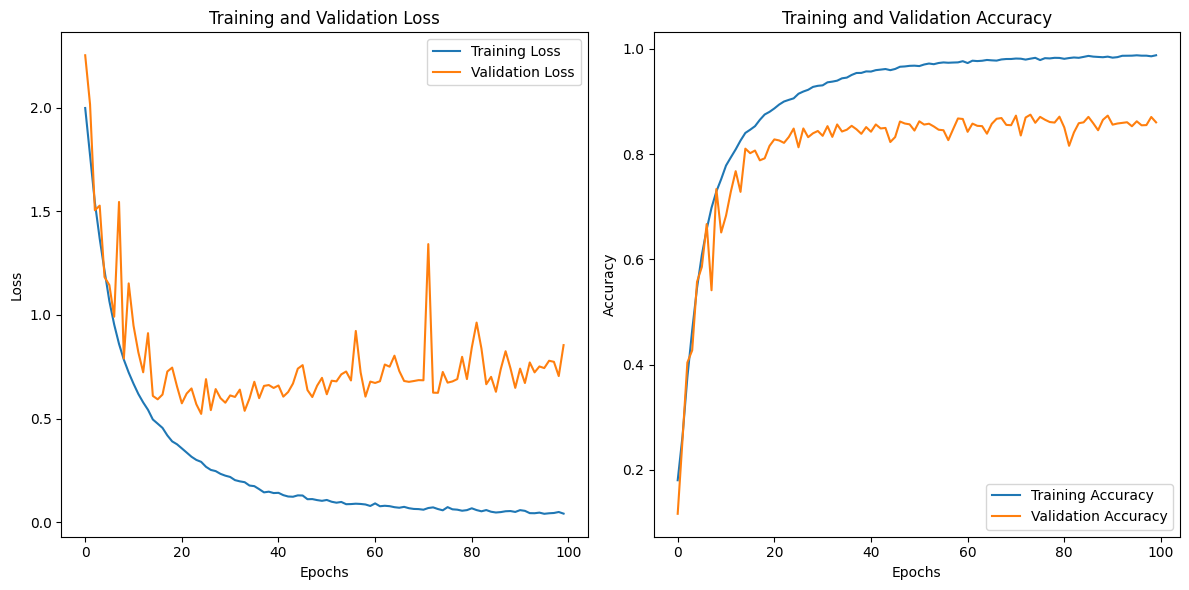

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
predictions= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [12]:
predicted_labels = np.argmax(predictions, axis=1)

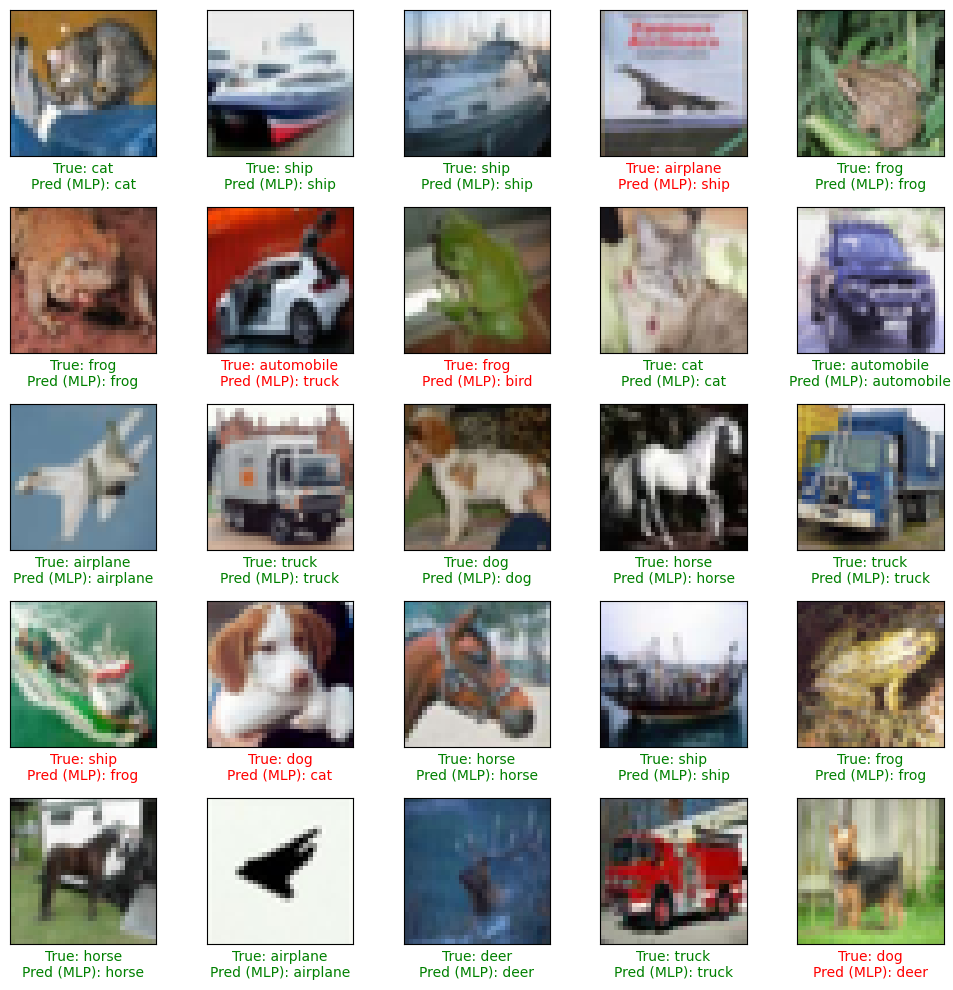

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

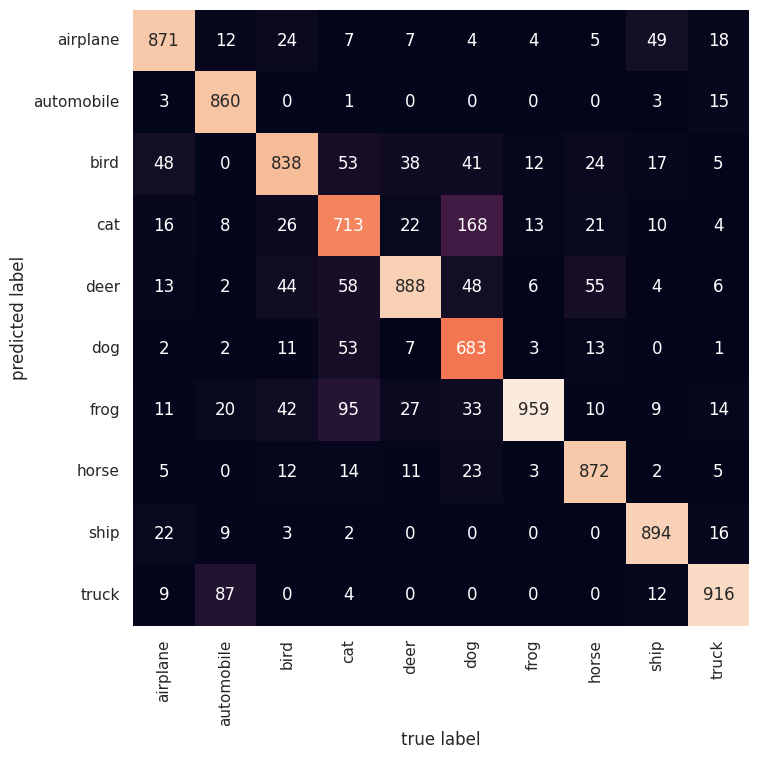

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [15]:
print(classification_report(y_test, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.87      0.87      0.87      1000
  automobile       0.98      0.86      0.91      1000
        bird       0.78      0.84      0.81      1000
         cat       0.71      0.71      0.71      1000
        deer       0.79      0.89      0.84      1000
         dog       0.88      0.68      0.77      1000
        frog       0.79      0.96      0.86      1000
       horse       0.92      0.87      0.90      1000
        ship       0.95      0.89      0.92      1000
       truck       0.89      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## CNN More Layer - Optimized

In [27]:
model = models.Sequential(name="CNN_model")

model.add(layers.InputLayer(input_shape=(32, 32, 3)))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))



optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 15,251,018 (58.18 MB)

 Trainable params: 15,248,074 (58.17 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


In [30]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_classify_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history = model.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=256),
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train_final) // 256,
    epochs=100,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.1551 - loss: 2.1326
Epoch 1: val_loss improved from inf to 2.97095, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.1553 - loss: 2.1319 - val_accuracy: 0.1000 - val_loss: 2.9710
Epoch 2/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2266 - loss: 1.8919

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 2.97095
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2266 - loss: 1.8919 - val_accuracy: 0.1000 - val_loss: 3.0122
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2157 - loss: 1.8823
Epoch 3: val_loss improved from 2.97095 to 2.01444, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.2158 - loss: 1.8821 - val_accuracy: 0.1894 - val_loss: 2.0144
Epoch 4/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2422 - loss: 1.7842

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 4: val_loss improved from 2.01444 to 1.98349, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2422 - loss: 1.7842 - val_accuracy: 0.2036 - val_loss: 1.9835
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3011 - loss: 1.7474
Epoch 5: val_loss improved from 1.98349 to 1.95744, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.3013 - loss: 1.7471 - val_accuracy: 0.3194 - val_loss: 1.9574
Epoch 6/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3789 - loss: 1.6123

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 6: val_loss did not improve from 1.95744
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3789 - loss: 1.6123 - val_accuracy: 0.2996 - val_loss: 2.0542
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4059 - loss: 1.5256
Epoch 7: val_loss did not improve from 1.95744
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.4060 - loss: 1.5254 - val_accuracy: 0.3206 - val_loss: 2.3953
Epoch 8/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4688 - loss: 1.4056

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 8: val_loss did not improve from 1.95744
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4688 - loss: 1.4056 - val_accuracy: 0.3390 - val_loss: 2.1276
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4757 - loss: 1.3635
Epoch 9: val_loss improved from 1.95744 to 1.69837, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.4758 - loss: 1.3633 - val_accuracy: 0.4402 - val_loss: 1.6984
Epoch 10/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4609 - loss: 1.3044

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 10: val_loss did not improve from 1.69837
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4609 - loss: 1.3044 - val_accuracy: 0.4362 - val_loss: 1.8020
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5486 - loss: 1.2424
Epoch 11: val_loss improved from 1.69837 to 1.26362, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 129ms/step - accuracy: 0.5487 - loss: 1.2422 - val_accuracy: 0.5522 - val_loss: 1.2636
Epoch 12/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5508 - loss: 1.2203

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 12: val_loss did not improve from 1.26362
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5508 - loss: 1.2203 - val_accuracy: 0.5232 - val_loss: 1.3378
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5901 - loss: 1.1427
Epoch 13: val_loss improved from 1.26362 to 1.20643, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.5902 - loss: 1.1426 - val_accuracy: 0.5980 - val_loss: 1.2064
Epoch 14/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6328 - loss: 0.9991

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 14: val_loss improved from 1.20643 to 1.12263, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6328 - loss: 0.9991 - val_accuracy: 0.6154 - val_loss: 1.1226
Epoch 15/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6395 - loss: 1.0388
Epoch 15: val_loss improved from 1.12263 to 1.00570, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.6395 - loss: 1.0387 - val_accuracy: 0.6626 - val_loss: 1.0057
Epoch 16/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6484 - loss: 1.0771

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 16: val_loss improved from 1.00570 to 0.96184, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6484 - loss: 1.0771 - val_accuracy: 0.6732 - val_loss: 0.9618
Epoch 17/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6784 - loss: 0.9432
Epoch 17: val_loss did not improve from 0.96184
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.6784 - loss: 0.9431 - val_accuracy: 0.6304 - val_loss: 1.1595
Epoch 18/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6914 - loss: 0.8528

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 18: val_loss did not improve from 0.96184
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6914 - loss: 0.8528 - val_accuracy: 0.6246 - val_loss: 1.1969
Epoch 19/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6971 - loss: 0.8818
Epoch 19: val_loss did not improve from 0.96184
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.6971 - loss: 0.8818 - val_accuracy: 0.6634 - val_loss: 1.0535
Epoch 20/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6484 - loss: 1.0316

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 20: val_loss did not improve from 0.96184
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6484 - loss: 1.0316 - val_accuracy: 0.6552 - val_loss: 1.0809
Epoch 21/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7177 - loss: 0.8358
Epoch 21: val_loss improved from 0.96184 to 0.95384, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.7177 - loss: 0.8357 - val_accuracy: 0.7000 - val_loss: 0.9538
Epoch 22/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7227 - loss: 0.8434

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 22: val_loss did not improve from 0.95384
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7227 - loss: 0.8434 - val_accuracy: 0.6908 - val_loss: 0.9861
Epoch 23/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7359 - loss: 0.7984
Epoch 23: val_loss did not improve from 0.95384
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7360 - loss: 0.7983 - val_accuracy: 0.6228 - val_loss: 1.3283
Epoch 24/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7500 - loss: 0.7502

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 24: val_loss did not improve from 0.95384
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.7502 - val_accuracy: 0.6152 - val_loss: 1.3406
Epoch 25/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7571 - loss: 0.7407
Epoch 25: val_loss improved from 0.95384 to 0.78409, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.7571 - loss: 0.7407 - val_accuracy: 0.7402 - val_loss: 0.7841
Epoch 26/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7578 - loss: 0.6762

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 26: val_loss did not improve from 0.78409
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7578 - loss: 0.6762 - val_accuracy: 0.7314 - val_loss: 0.8017
Epoch 27/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7665 - loss: 0.7152
Epoch 27: val_loss did not improve from 0.78409
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7666 - loss: 0.7151 - val_accuracy: 0.7352 - val_loss: 0.8499
Epoch 28/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7539 - loss: 0.8649

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 28: val_loss did not improve from 0.78409
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7539 - loss: 0.8649 - val_accuracy: 0.7296 - val_loss: 0.8645
Epoch 29/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7839 - loss: 0.6675
Epoch 29: val_loss did not improve from 0.78409
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7838 - loss: 0.6676 - val_accuracy: 0.7454 - val_loss: 0.8207
Epoch 30/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8281 - loss: 0.5980

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 30: val_loss did not improve from 0.78409
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8281 - loss: 0.5980 - val_accuracy: 0.7418 - val_loss: 0.8422
Epoch 31/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7899 - loss: 0.6425
Epoch 31: val_loss improved from 0.78409 to 0.70712, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.7899 - loss: 0.6426 - val_accuracy: 0.7656 - val_loss: 0.7071
Epoch 32/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7891 - loss: 0.6549

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 32: val_loss did not improve from 0.70712
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7891 - loss: 0.6549 - val_accuracy: 0.7612 - val_loss: 0.7140
Epoch 33/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7953 - loss: 0.6302
Epoch 33: val_loss did not improve from 0.70712
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.7953 - loss: 0.6302 - val_accuracy: 0.7684 - val_loss: 0.7784
Epoch 34/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7930 - loss: 0.6389

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 34: val_loss did not improve from 0.70712
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.6389 - val_accuracy: 0.7634 - val_loss: 0.7976
Epoch 35/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8080 - loss: 0.5927
Epoch 35: val_loss improved from 0.70712 to 0.61811, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.8080 - loss: 0.5927 - val_accuracy: 0.7988 - val_loss: 0.6181
Epoch 36/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8047 - loss: 0.5448

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 36: val_loss improved from 0.61811 to 0.60087, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8047 - loss: 0.5448 - val_accuracy: 0.8004 - val_loss: 0.6009
Epoch 37/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8157 - loss: 0.5749
Epoch 37: val_loss did not improve from 0.60087
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.8157 - loss: 0.5750 - val_accuracy: 0.8060 - val_loss: 0.6315
Epoch 38/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8359 - loss: 0.5886

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 38: val_loss did not improve from 0.60087
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.5886 - val_accuracy: 0.7980 - val_loss: 0.6511
Epoch 39/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8214 - loss: 0.5570
Epoch 39: val_loss did not improve from 0.60087
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.8214 - loss: 0.5571 - val_accuracy: 0.8078 - val_loss: 0.6243
Epoch 40/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8047 - loss: 0.5683

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 40: val_loss did not improve from 0.60087
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8047 - loss: 0.5683 - val_accuracy: 0.8026 - val_loss: 0.6348
Epoch 41/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8256 - loss: 0.5479
Epoch 41: val_loss improved from 0.60087 to 0.55479, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 131ms/step - accuracy: 0.8256 - loss: 0.5478 - val_accuracy: 0.8188 - val_loss: 0.5548
Epoch 42/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8555 - loss: 0.4743

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 42: val_loss did not improve from 0.55479
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.4743 - val_accuracy: 0.8082 - val_loss: 0.5881
Epoch 43/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8277 - loss: 0.5306
Epoch 43: val_loss did not improve from 0.55479
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8278 - loss: 0.5306 - val_accuracy: 0.7958 - val_loss: 0.6509
Epoch 44/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8672 - loss: 0.5056

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 44: val_loss did not improve from 0.55479
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.5056 - val_accuracy: 0.8028 - val_loss: 0.6215
Epoch 45/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8371 - loss: 0.5021
Epoch 45: val_loss did not improve from 0.55479
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.8371 - loss: 0.5021 - val_accuracy: 0.7500 - val_loss: 0.8442
Epoch 46/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8125 - loss: 0.5716

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 46: val_loss did not improve from 0.55479
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.5716 - val_accuracy: 0.7552 - val_loss: 0.8348
Epoch 47/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8405 - loss: 0.5014
Epoch 47: val_loss improved from 0.55479 to 0.53881, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.8405 - loss: 0.5014 - val_accuracy: 0.8308 - val_loss: 0.5388
Epoch 48/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8516 - loss: 0.4784

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 48: val_loss improved from 0.53881 to 0.52836, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8516 - loss: 0.4784 - val_accuracy: 0.8300 - val_loss: 0.5284
Epoch 49/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8454 - loss: 0.4804
Epoch 49: val_loss improved from 0.52836 to 0.50018, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.8454 - loss: 0.4804 - val_accuracy: 0.8382 - val_loss: 0.5002
Epoch 50/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8359 - loss: 0.5771

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 50: val_loss improved from 0.50018 to 0.49070, saving model to best_classify_model.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8359 - loss: 0.5771 - val_accuracy: 0.8426 - val_loss: 0.4907
Epoch 51/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8513 - loss: 0.4708
Epoch 51: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.8513 - loss: 0.4708 - val_accuracy: 0.8388 - val_loss: 0.4941
Epoch 52/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7930 - loss: 0.6136

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 52: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.6136 - val_accuracy: 0.8402 - val_loss: 0.4936
Epoch 53/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8503 - loss: 0.4635
Epoch 53: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.8503 - loss: 0.4636 - val_accuracy: 0.8372 - val_loss: 0.5014
Epoch 54/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8320 - loss: 0.4555

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 54: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.4555 - val_accuracy: 0.8340 - val_loss: 0.5141
Epoch 55/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8581 - loss: 0.4527
Epoch 55: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8581 - loss: 0.4527 - val_accuracy: 0.8102 - val_loss: 0.6193
Epoch 56/100
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8438 - loss: 0.5049

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 56: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.5049 - val_accuracy: 0.8078 - val_loss: 0.6277
Epoch 57/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8571 - loss: 0.4363
Epoch 57: val_loss did not improve from 0.49070
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8571 - loss: 0.4363 - val_accuracy: 0.8048 - val_loss: 0.6310
Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 50.


In [32]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.8785
✅ Test Accuracy: 0.8466

✅ Train Loss: 0.3727
✅ Test Loss: 0.4881


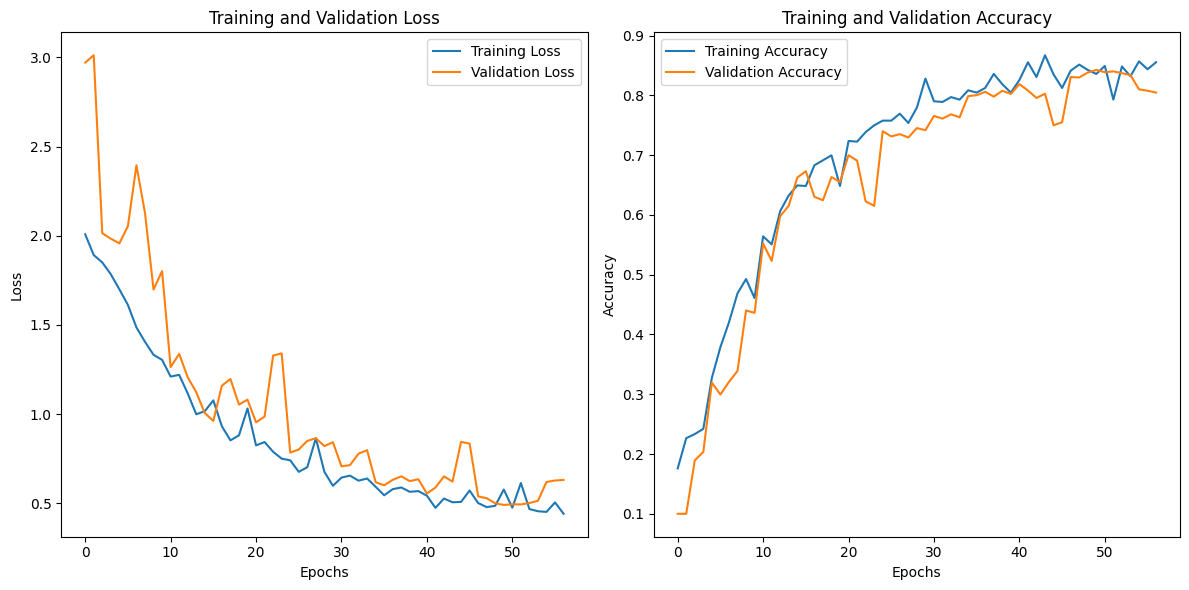

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
predictions= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


In [35]:
predicted_labels = np.argmax(predictions, axis=1)

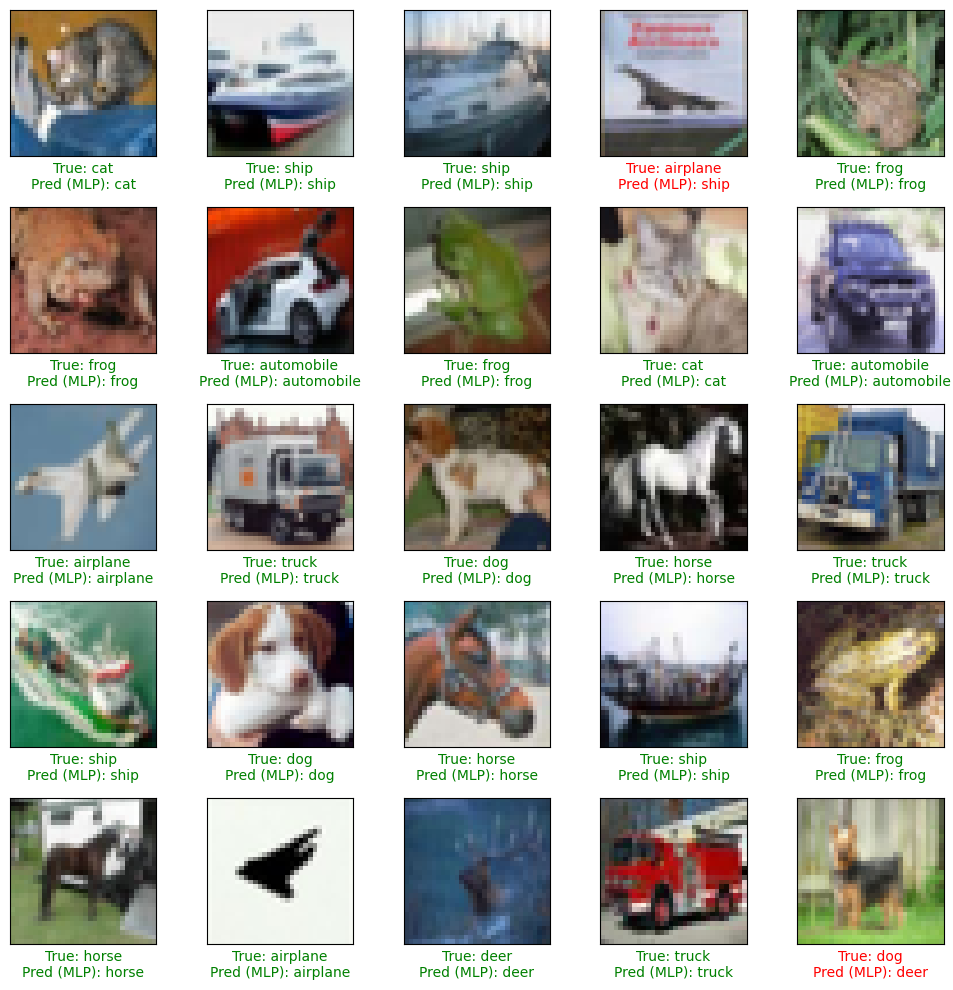

In [36]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

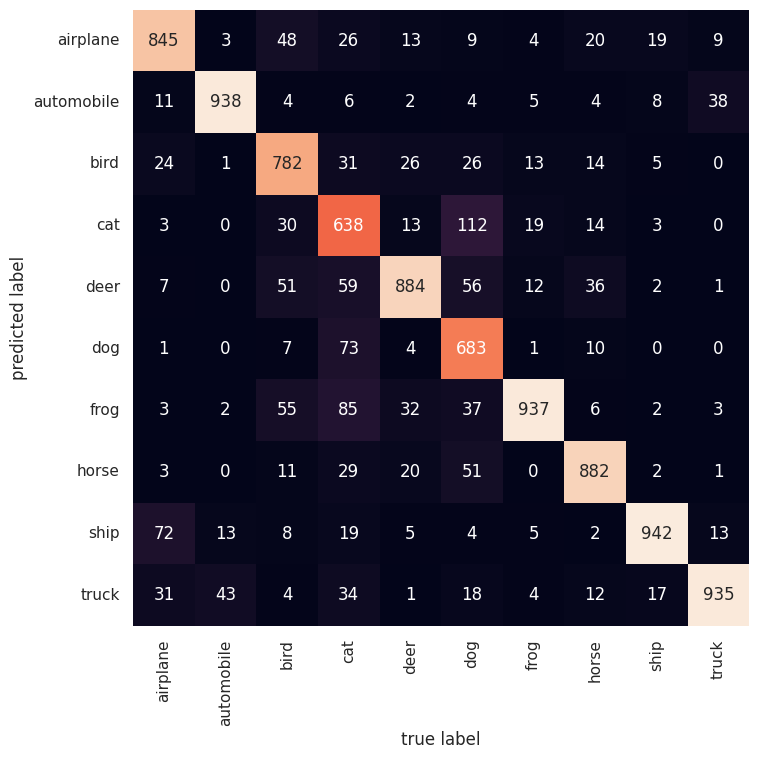

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [38]:
print(classification_report(y_test, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.85      0.84      0.85      1000
  automobile       0.92      0.94      0.93      1000
        bird       0.85      0.78      0.81      1000
         cat       0.77      0.64      0.70      1000
        deer       0.80      0.88      0.84      1000
         dog       0.88      0.68      0.77      1000
        frog       0.81      0.94      0.87      1000
       horse       0.88      0.88      0.88      1000
        ship       0.87      0.94      0.90      1000
       truck       0.85      0.94      0.89      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



# Summary

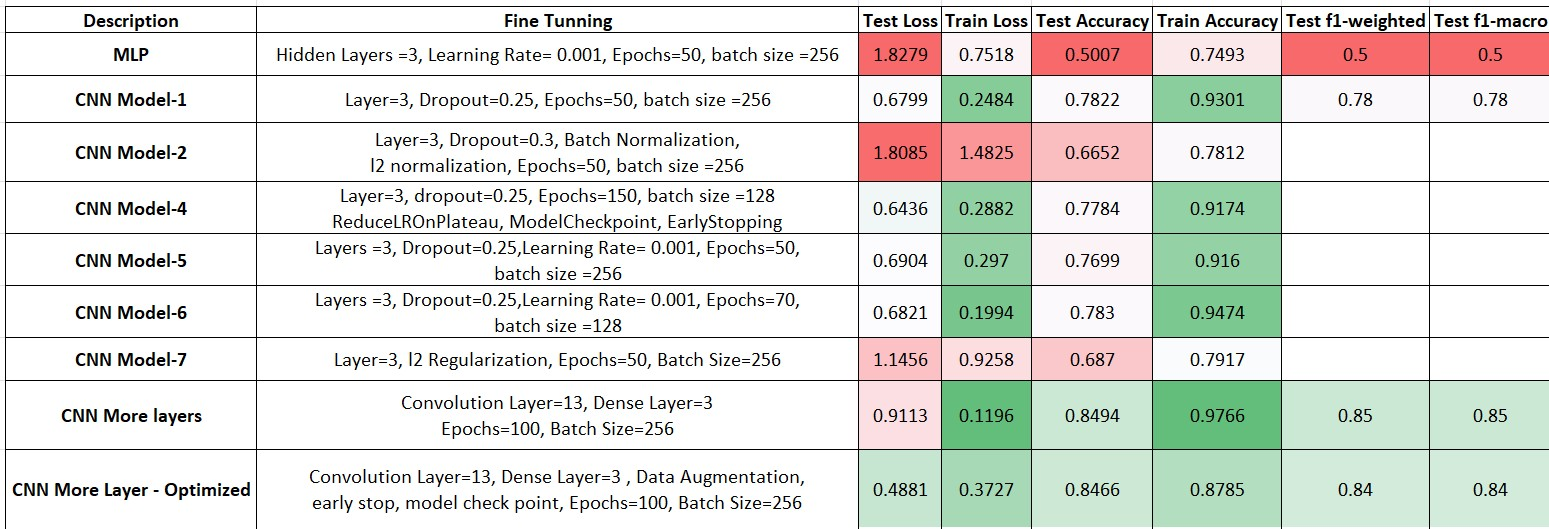

**Conclusion**: The above table higlights that the "CNN More Layer - Optimized" Model works well incomparision of all other models. It has Test accuracy of 84.6% and Train accuracy of 87.8%, with Test loss 0.48 and Train Loss of 0.37. The main reason of the model delivering good result is due to more layers used like in VGG Architecture combined with data augmentation and earlystop.

**Findings:** Inorder to get good accuracy several techniques were used such as  L2 regularization,Reduce LR on Plateau, changing batch size, but none of them worked because the model used earlier was simplier and when it was accompained by more complexity like VGG architecture it performed well with Batch Normalization and dropouts but the test error was high, this was catered by performing data augmentation which reduced test error from 0.91 to 0.48.

# Comparision of All Models Learning Curve

### MLP

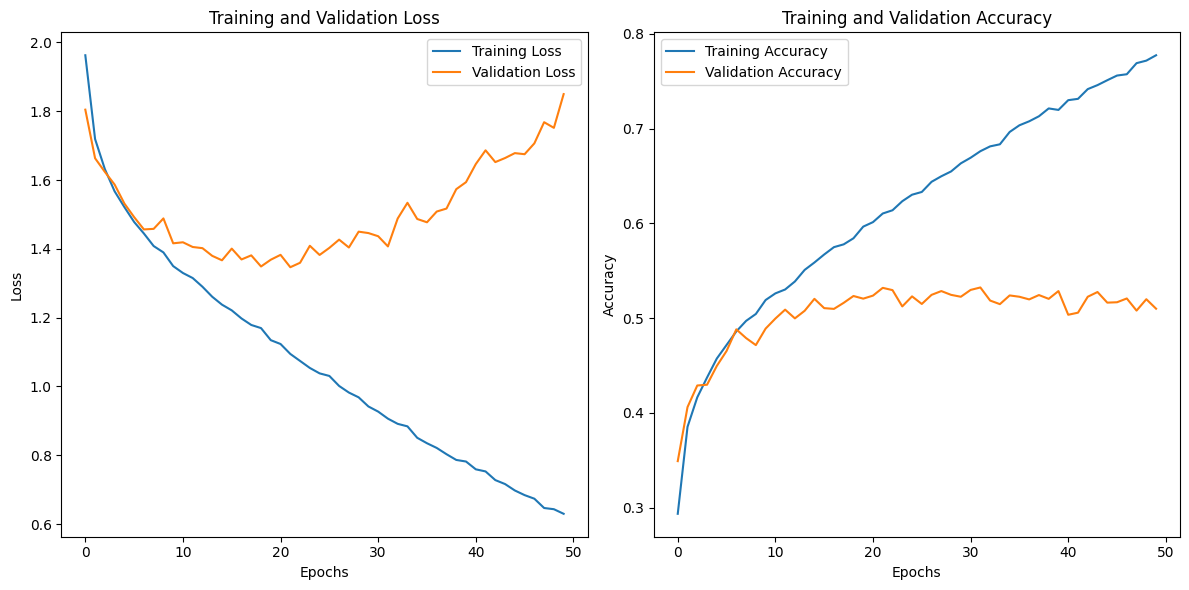

### CNN Model-1

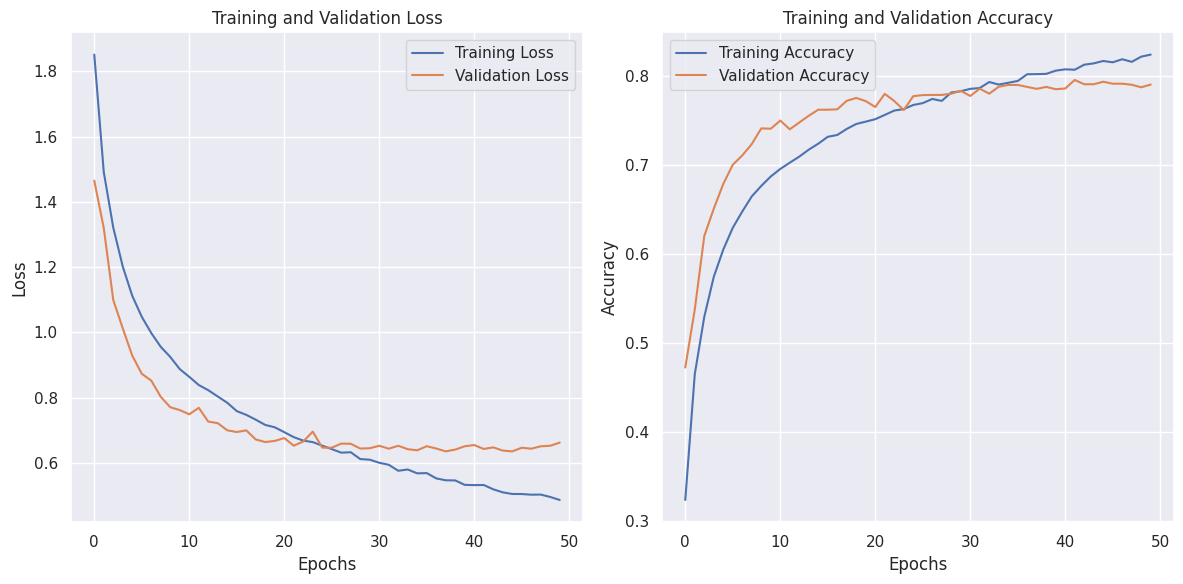

### CNN Model-2

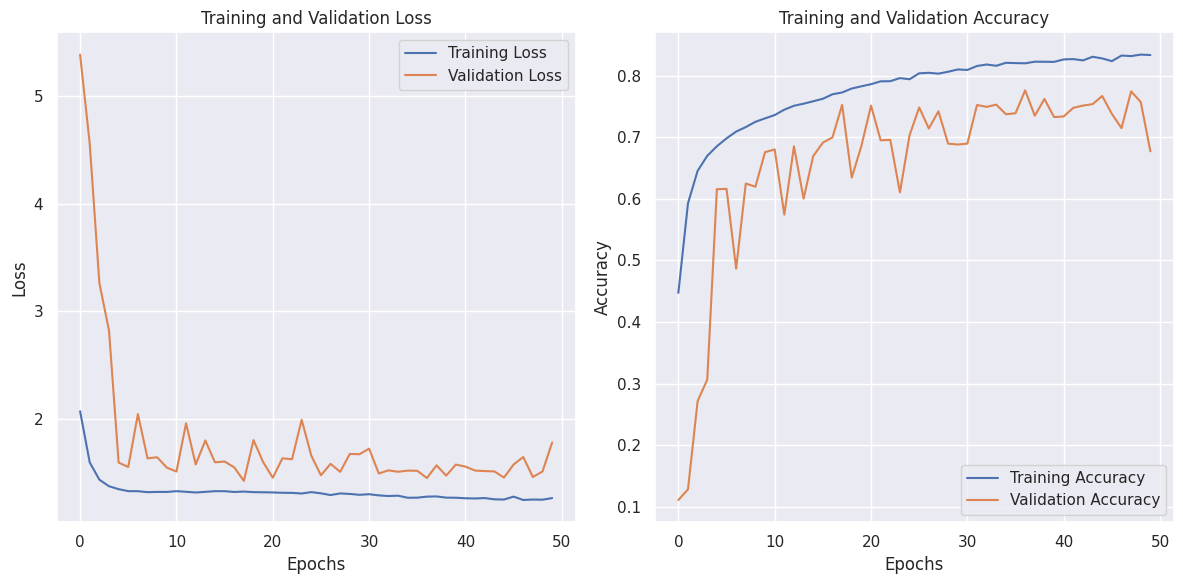

### CNN Model-4

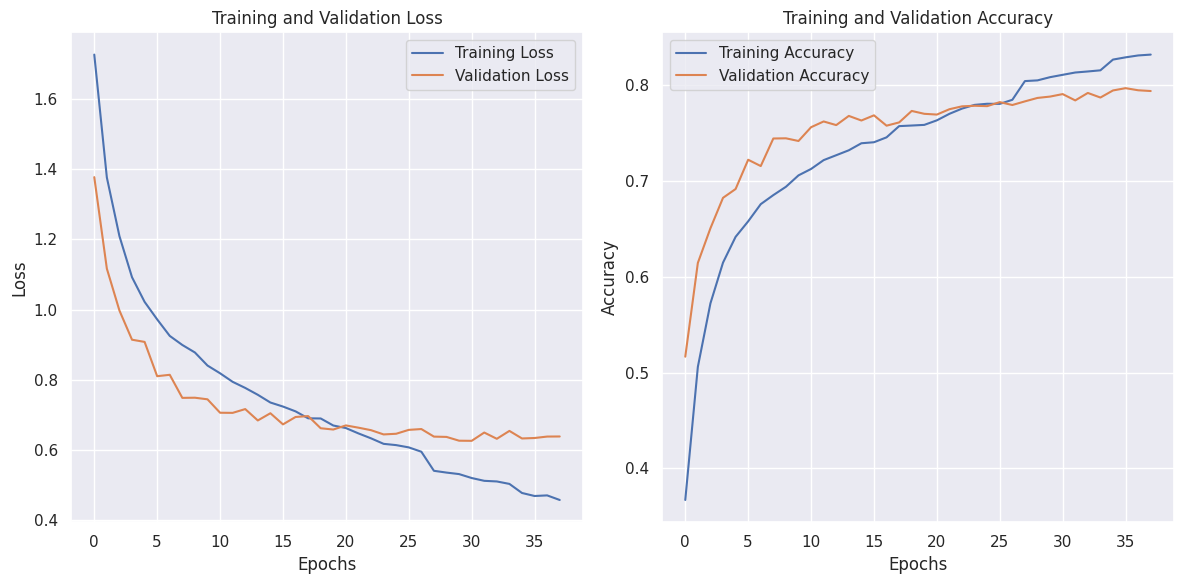

### CNN Model-5

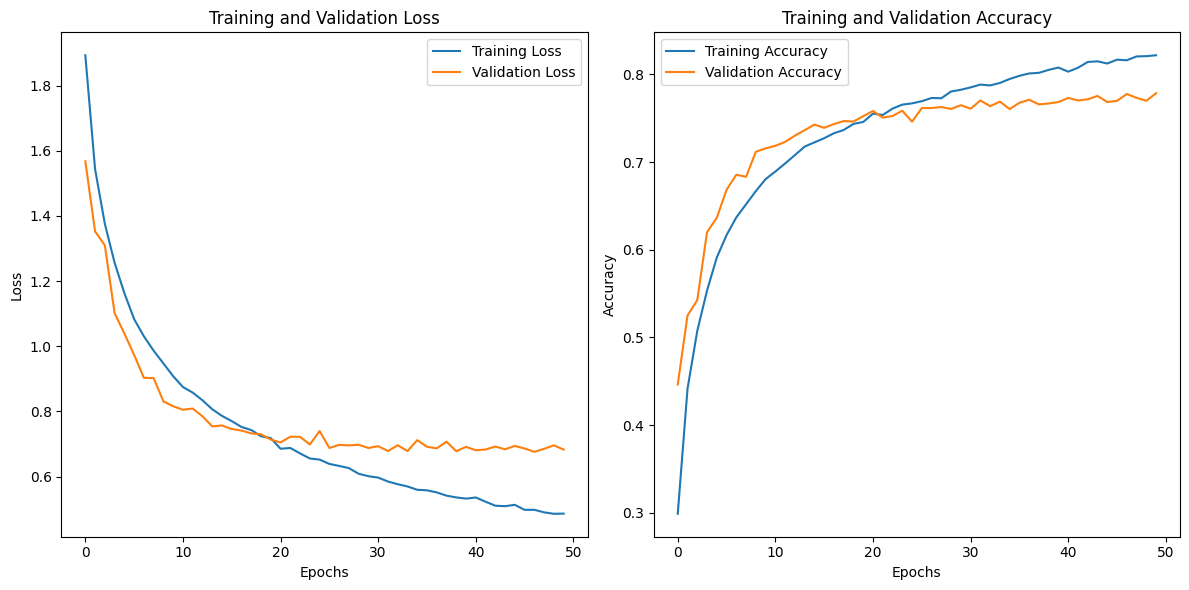

### CNN Model-6

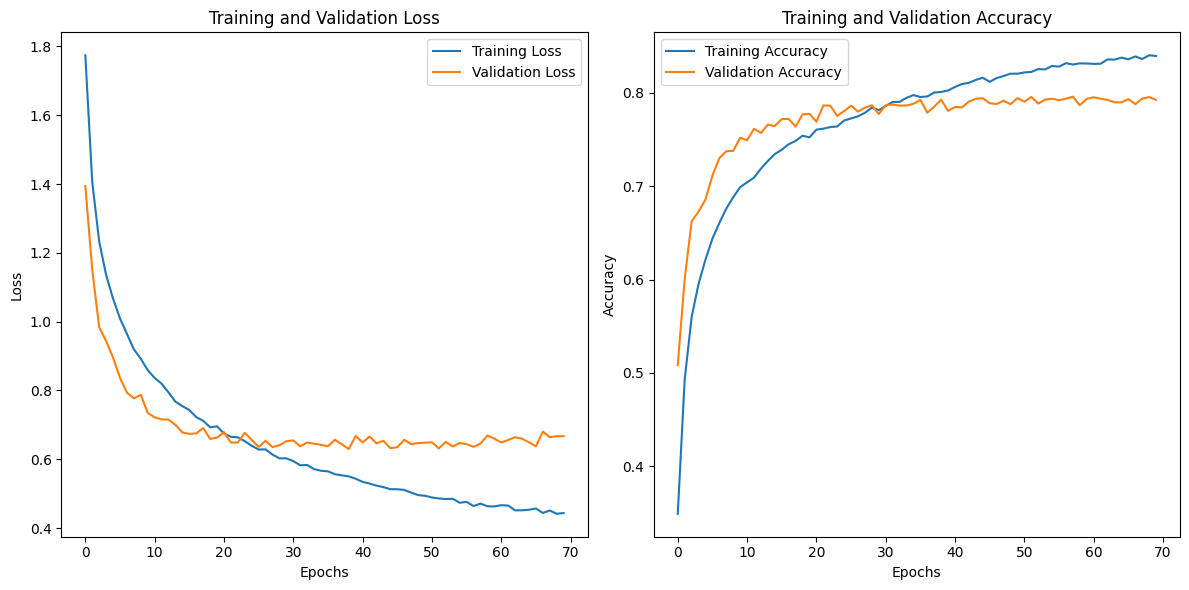

### CNN Model-7

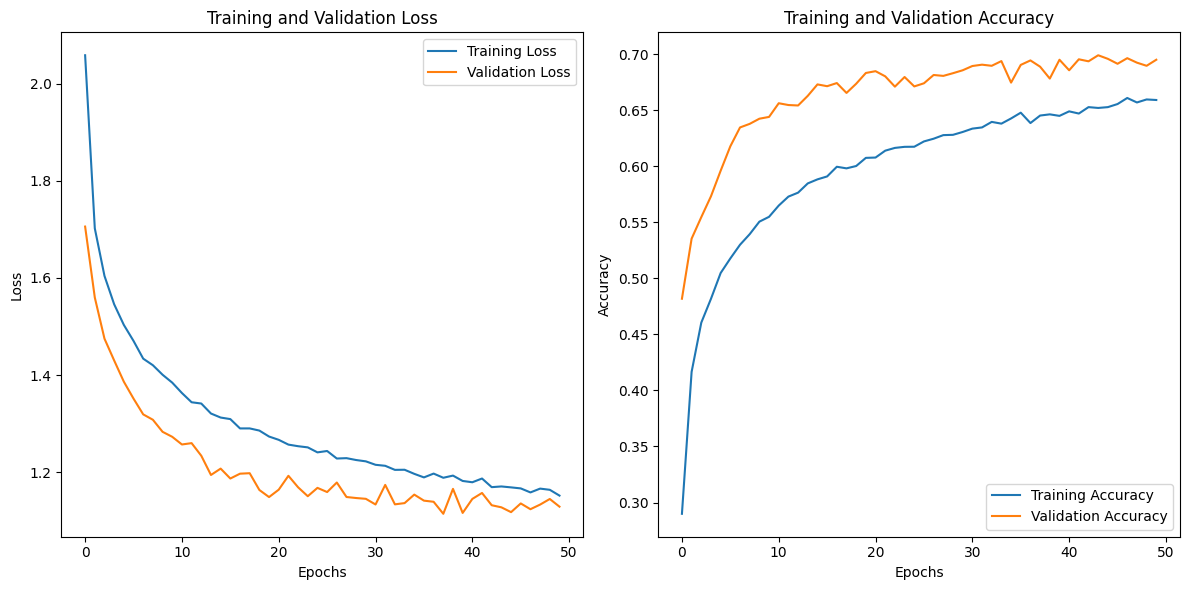

### CNN Model More Layers

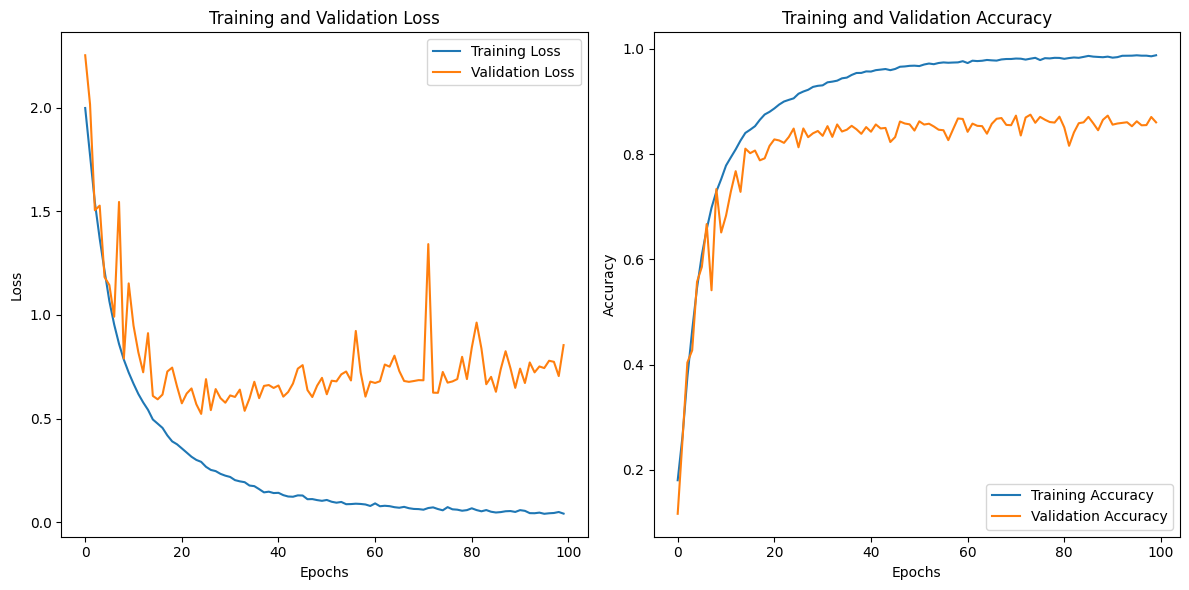

### CNN Model More Layers - Optimized

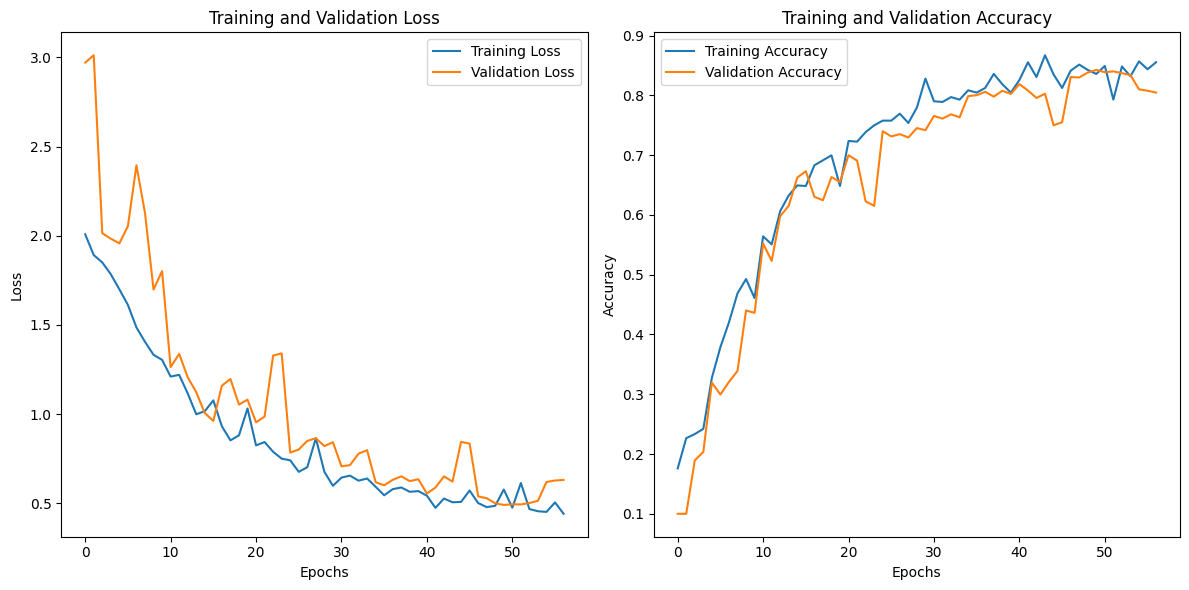

### Confusion Matrix - CNN More Layer - Optimized Model

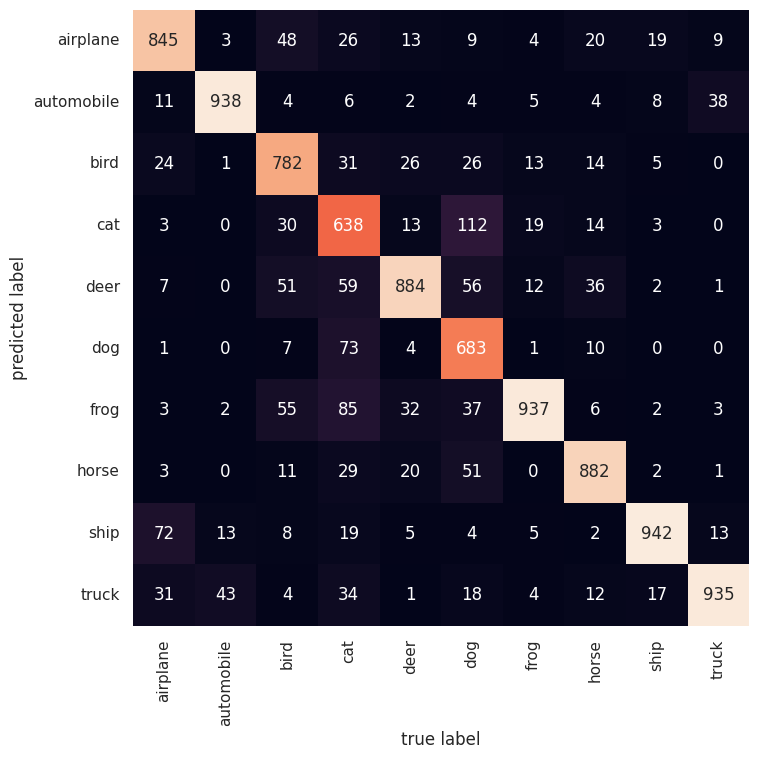